# "Analisi" dei dati muonici

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

## Spettro

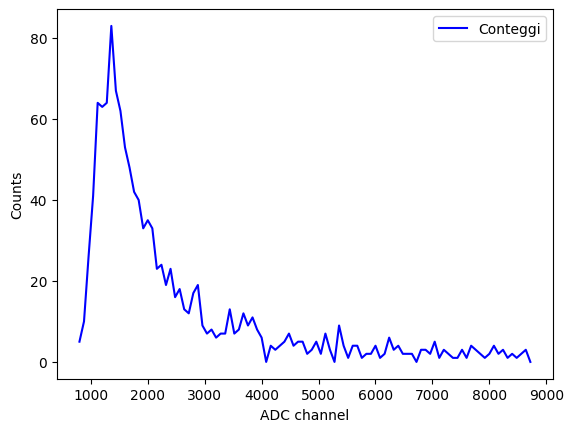

In [6]:
root_path = 'Dati/Parte 2/Muoni'
spettro = read_corretto(root_path + '/1ora.txt')

# Dimezza il numero di bin raggruppando ogni 2 righe
spettro_half_bins = spettro.groupby(spettro.index // 4).agg({'ADC': 'mean', 'Counts': 'sum'}).reset_index(drop=True)
spettro_ = crop_df(spettro_half_bins, 10, 1)

range = len(spettro_['ADC']) - 50

plt.plot(spettro_['ADC'][:range], spettro_['Counts'][:range], label='Conteggi', color='blue')
plt.xlabel('ADC channel')
plt.ylabel('Counts')
plt.legend()
plt.show()

## Staircase

In [ ]:
staircase = pd.read_csv(root_path + '/staircase.txt', sep='	').dropna()

staircase['Frequency_d'][4] = (staircase['Frequency_d'][3] - staircase['Frequency_d'][5]) / 2.5


/tmp/ipykernel_49287/1534128826.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  staircase['Frequency_d'][4] = (staircase['Frequency_d'][3] - staircase['Frequency_d'][5]) / 2.5
/tmp/ipykernel_49287/1534128826.py:3: SettingWithCopyWarning:

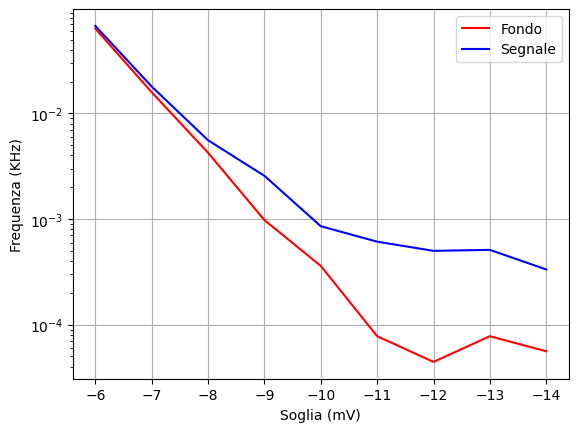

In [10]:
plt.plot(staircase['Threshold_d'], staircase['Frequency_d'], label='Fondo', color='red')
plt.plot(staircase['Threshold_s'], staircase['Frequency_s'], label='Segnale', color='blue')
plt.gca().invert_xaxis()

plt.yscale('log')
plt.xlabel('Soglia (mV)')
plt.ylabel('Frequenza (KHz)')
plt.legend()
plt.grid()

plt.xticks(np.arange(int(staircase['Threshold_d'].min()), int(staircase['Threshold_d'].max()) + 1, 1))
plt.show()